# Taxi rides Analysis

### Introduction

Project's goal is to study the data on taxi rides and dropoffs from different neighborhoods in Chicago on November 15-16, 2017, and draw conclusions that will help improve the current operations. 

This project includes Statistical Data Analysis.

### Importing Data

In [1]:
#Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from scipy import stats as st

In [2]:
#Importing data files:

file_1 = "C:\\Users\\Shir\\Downloads\\Practicum\\Library\\project_sql_result_01.csv"
file_2 = "C:\\Users\\Shir\\Downloads\\Practicum\\Library\\project_sql_result_04.csv"

trips_amount = pd.read_csv(file_1)
average_trips = pd.read_csv(file_2)

In [3]:
#trips_amount description:

print('\033[1m', 'trips_amount', '\033[0m')
print('--------------------------------------')        
display(trips_amount.info())
display(trips_amount.describe())
display(trips_amount.head(5))

 trips_amount 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


trips_amount table contains 64 rows and 2 columns: company_name - string and trips_amount - integer.

In [4]:
#average_trips description:

print('\033[1m', 'average_trips', '\033[0m')
print('--------------------------------------')        
display(average_trips.info())
display(average_trips.describe())
display(average_trips.head(5))

 average_trips 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


average_trips table contains 94 rows and 2 columns: dropoff_location_name - string and average_trips - float.

### Conclusion

We have 2 data files, first file contains data on dropoff locations and the average trip for each location. Second file contains data on company names and trips amount. No missing values or data type that require convertion.

## Exploratory data analysis

In [5]:
#The top 10 neighborhoods in terms of drop-offs:

average_trips.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Loop is the most popular neighborhood, with total average trips of 10727.5

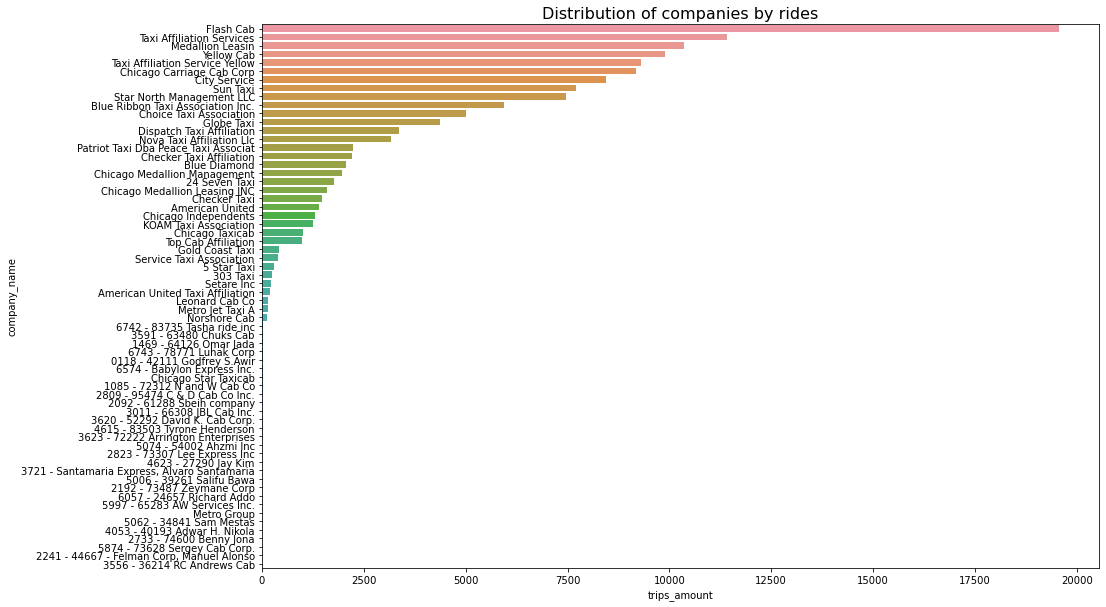

In [6]:
# look at the companies and rides:
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('Distribution of companies by rides', fontsize=16)
sns.barplot(x='trips_amount', y='company_name', data = trips_amount)
plt.show()

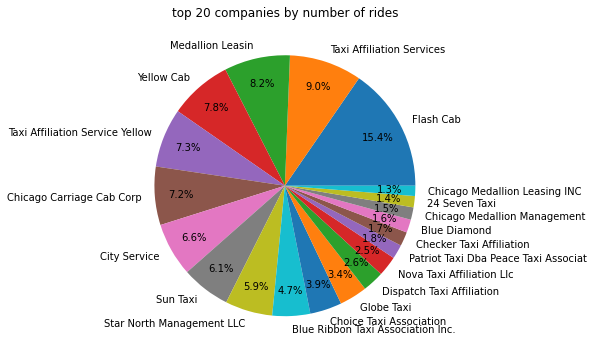

In [7]:
# Graph for top taxi companies and their share of rides:

trips_amount_new = trips_amount.groupby(['company_name'])['trips_amount'].sum().reset_index().sort_values(by='trips_amount', ascending = False)
top_companies = trips_amount_new.head(20)
top_companies.set_index('company_name').plot(y='trips_amount', kind='pie', title = 'top 20 companies by number of rides', figsize=(7, 6), autopct='%1.1f%%', pctdistance=0.8)
plt.legend().remove()
pylab.ylabel('')
plt.show();

As there are many companies with a low number of rides, I focused on the top 20 neighborhoods. Flash Cab has the major share with 15.4%

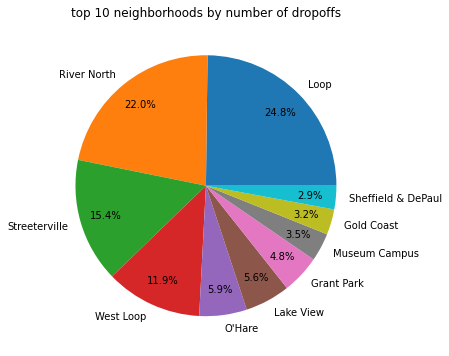

In [8]:
# Graph for the top 10 neighborhoods by number of dropoffs:

average_trips_new = average_trips.groupby(['dropoff_location_name'])['average_trips'].sum().reset_index().sort_values(by='average_trips', ascending = False)
top_neighborhoods = average_trips_new.head(10)
top_neighborhoods.set_index('dropoff_location_name').plot(y='average_trips', kind='pie', title = 'top 10 neighborhoods by number of dropoffs', figsize=(7, 6), autopct='%1.1f%%', pctdistance=0.8)
plt.legend().remove()
pylab.ylabel('')
plt.show();

Loop has the major share with 24.8%, River North is in the second place with 22%

## Testing hypotheses

### Importing data

In [11]:
#Importing data files:

file_3 = "C:\\Users\\Shir\\Downloads\\Practicum\\Library\\project_sql_result_07.csv"

loop_to_ohare = pd.read_csv(file_3)

In [12]:
#loop_to_ohare description:

print('\033[1m', 'loop_to_ohare', '\033[0m')
print('--------------------------------------')        
display(loop_to_ohare.info())
display(loop_to_ohare.describe())
display(loop_to_ohare.head(5))

 loop_to_ohare 
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Conclusion:
loop_to_ohare table contains data on rides from the Loop neighborhood to O'Hare International Airport. It has 1068 rows and 3 columns:
1. start_ts as a string - needs to be converted to date data type.
2. weather_conditions (Good/Bad) as a string.
3. duration_seconds as float - needs to be converted to int type, and has errors, rides with 0 duration.

### Data Preprocessing

In [13]:
#Changing data types:
loop_to_ohare['start_ts'] = pd.to_datetime(loop_to_ohare['start_ts'])
loop_to_ohare['duration_seconds'] = loop_to_ohare.duration_seconds.astype(int)

In [14]:
#counting errors:
(loop_to_ohare['duration_seconds'] == 0).sum() / len(loop_to_ohare['duration_seconds'])

0.0056179775280898875

Rides with 0 duration are illogical and are a very small percent of the data, so they will be dropped.

In [15]:
#removing errors:
loop_to_ohare = loop_to_ohare[loop_to_ohare['duration_seconds'] != 0]

### Data Analysis

We want to test the hypotheses on rides made on rainy saturadys only, ler's check the data:

In [16]:
#create a column for day of the week:
loop_to_ohare['day_of_the_week'] = loop_to_ohare['start_ts'].dt.weekday
#look at the distribution in the data:
loop_to_ohare['day_of_the_week'].value_counts()

5    1062
Name: day_of_the_week, dtype: int64

The data contains only Saturadys

In [17]:
#Group by rainy and good(no rain) days:
loop_to_ohare_rainy = loop_to_ohare[loop_to_ohare['weather_conditions'] == 'Bad']
loop_to_ohare_good = loop_to_ohare[loop_to_ohare['weather_conditions'] == 'Good']

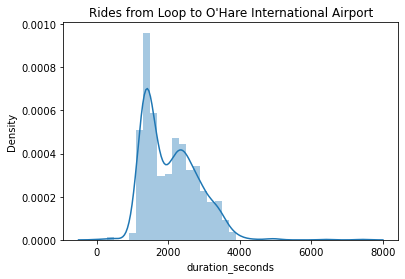

In [21]:
import warnings
warnings.filterwarnings("ignore")

#Look at the duration of rides from Loop neighborhood to O'Hare International Airport
sns.distplot(loop_to_ohare["duration_seconds"], bins=list(range(100, 4000, 200)))
plt.title("Rides from Loop to O'Hare International Airport",fontsize=12)
plt.show()

In [22]:
loop_to_ohare["duration_seconds"].describe()

count    1062.000000
mean     2083.435970
std       755.651796
min        60.000000
25%      1440.000000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Right-skewed distribution where the mean(2083 seconds) is higher then the median (1980 seconds). 


### Formulating the hypotheses

Formulating the H0 and H1 hypotheses.

H0 = average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is the same as on non-rainy Saturadys.

H1 = average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is not the same as on non-rainy Saturadys.

critical statistical significance level(alpha) = 0.05

In [23]:
#check the mean of both populations:
loop_to_ohare.groupby('weather_conditions').duration_seconds.describe().loc[['Good', 'Bad']]


,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Good,882.0,2013.278912,743.565217,60.0,1397.25,1800.0,2460.0,7440.0
Bad,180.0,2427.205556,721.314138,480.0,1962.00,2540.0,2928.0,4980.0


In [24]:
display(loop_to_ohare.query('weather_conditions == "Good"').duration_seconds.var())
display(loop_to_ohare.query('weather_conditions == "Bad"').duration_seconds.var())

552889.2319951821

520294.08600248274

We see that the mean and the variance is different, so we can't assume equal means in this case. equal_var will be set to False.

In [25]:
# perform a t-test
results = st.ttest_ind(loop_to_ohare_rainy['duration_seconds'], loop_to_ohare_good['duration_seconds'], equal_var=False)
alpha = 0.05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

p-value: 2.4173590471585584e-11
We reject the null hypohesis


The p-value is not higher than the alpha, and we reject the null hypothesis, meaning that the average duration of rides from the Loop to O'Hare International Airport significantly change on rainy Saturdays.

## Conclusion

Project's goal was to study the data on taxi rides and dropoffs from different neighborhoods ןמ Chicago on November 15-16, 2017, and draw conclusions that will help improve the current operations. For further analysis, a hepotesis on the duration of rides from the Loop neighborhood to O'Hare International Airport on rainy Saturdays was tested.

The data contains information on 64 companies and 94 drop off locations from 2017. 
Data preprocessing was made by converting data types and removing errors - rides with 0 duration.

Exploratory data analysis was made by cofusing on the top 10 neighborhoods in terms of drop-offs, and top 20 companies in terms of rides. Loop is the most popular neighborhood, with 10727 total average trips and rides share of 24.8%. River North is in the second place with 22% share. The most popular company is Flash Cab with 15.4% share.

Data was categorized by the weather condition, where bad weather indicates rainy days.

For further analysis, we focused on rides made from the Loop neighborhood to O'Hare International Airport, the average ride duration was 34 minutes.

Statistical data analysis was formulated by checking the hypothesis on the equality of two population means, 0.05 used as the critical statistical significance level. The hypothesis was tested and we couldn't confirm that the average ride duration from the Loop neighborhood to O'Hare International Airport on rainy Saturdays is the same as on non-rainy days.